## This is a demo to download DEM of a given coordinate box from MML database and delineate catchments

In [1]:
# modules
from tools import dem_from_mml, delineate_catchment_from_dem, fill_cmask_holes
import pandas as pd
import numpy as np

# inputs parameters
subset = [370000,7537500,390000,7557500] # coordinate box of the dem
apifile = r'C:\SpaFHy_GISPUTS\apikey.txt' # api-key for MML database (registration needed)
apikey = np.loadtxt(apifile, dtype='str') # api-key loaded from a txt-file

# reading stream outlet file
streams_file = 'F:\Pallaslake_Catchment\stream_outlets.csv'
streams = pd.read_csv(streams_file, sep=';', usecols=['stream'], encoding = "ISO-8859-1")['stream'].to_list()

# output path
outpath = r'F:\Pallaslake_Catchment\GIS_inputs'

#### Downloading DEM subset from MML database

In [2]:
dem, out_fp = dem_from_mml(outpath, 
                           subset, 
                           apikey=apikey)

#### Delineating multiple catchments as defined in stream_outlets.csv file 


*** Delineating pallasjoki catchment ***
*** pallasjoki catchment is delineated and DEM derivatives are saved ***

*** Delineating lompolonjankka catchment ***
*** lompolonjankka catchment is delineated and DEM derivatives are saved ***

*** Delineating ylisenpaanjankka catchment ***
*** ylisenpaanjankka catchment is delineated and DEM derivatives are saved ***

*** Delineating lompolonoja catchment ***
*** lompolonoja catchment is delineated and DEM derivatives are saved ***

*** Delineating pyhajoki catchment ***
*** pyhajoki catchment is delineated and DEM derivatives are saved ***


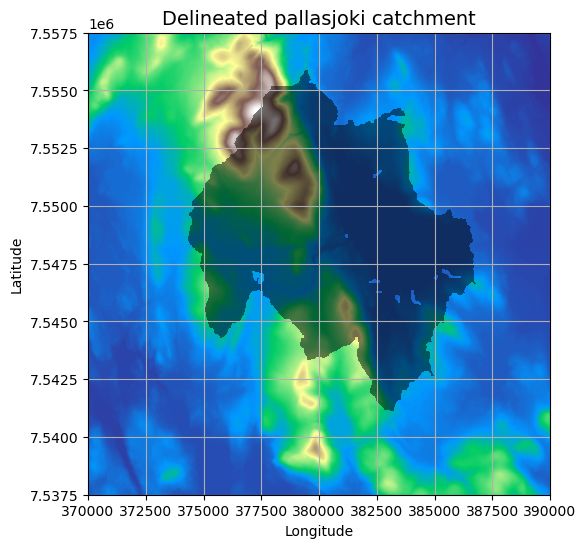

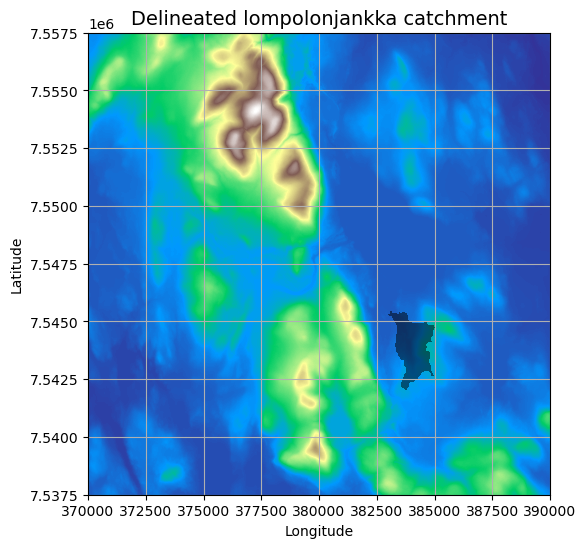

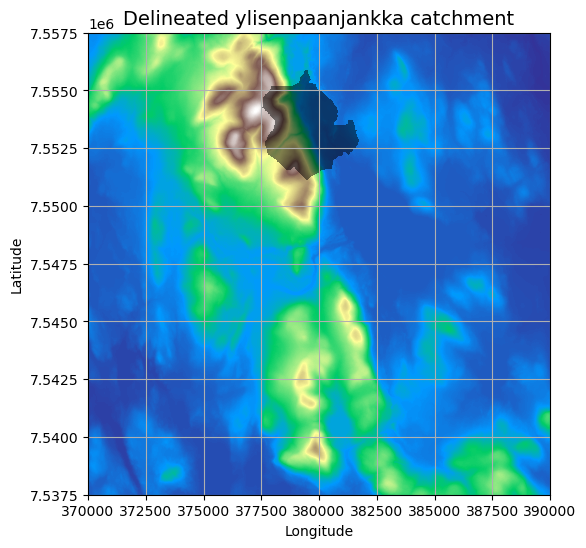

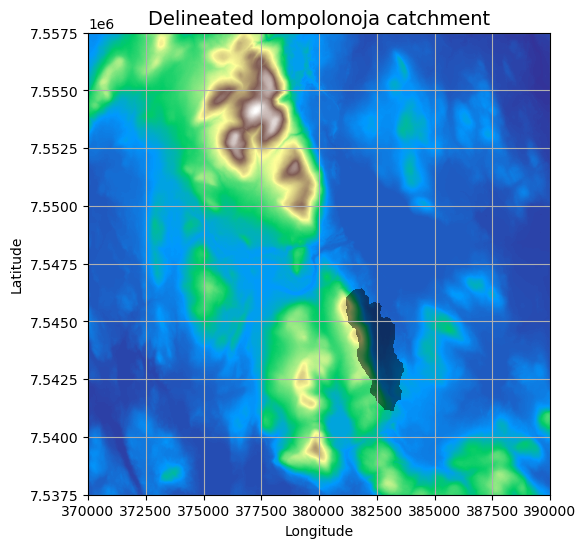

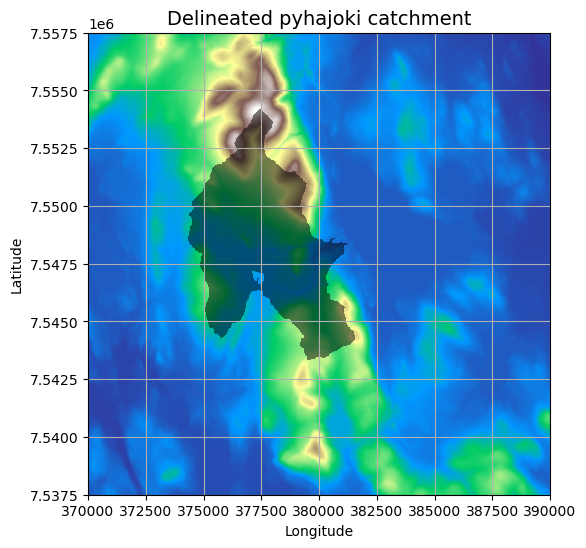

In [3]:
# loop catchment test
#out_fp = r'F:\Pallaslake_Catchment\GIS_inputs\korkeusmalli_16m.tif'
for catchment_name in streams:
    delineate_catchment_from_dem(dem_path=out_fp,
                             catchment_name=catchment_name,
                             outfolder=outpath,
                             outlet_file=streams_file,
                             clip_catchment=True)

#### Let's fill possible holes in catchments masks

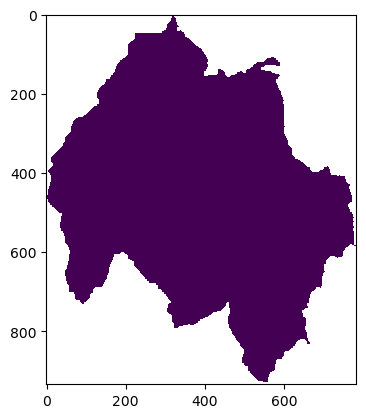

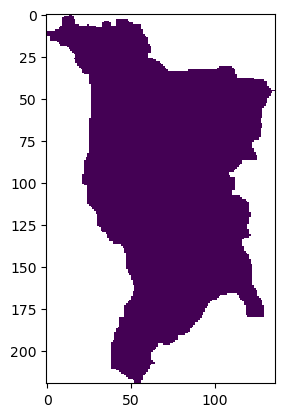

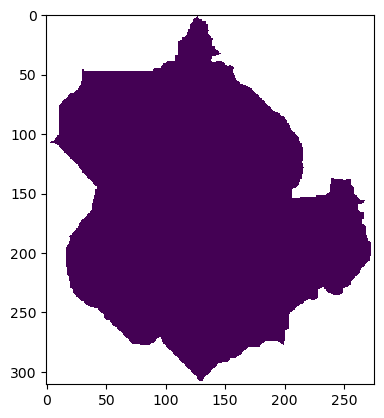

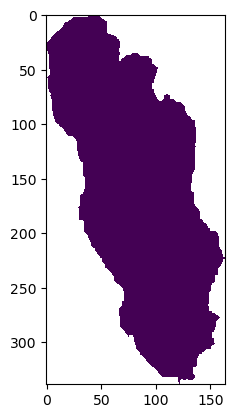

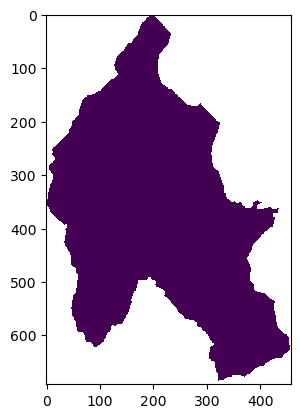

In [4]:
for catchment_name in streams:
    fn = f'F:\Pallaslake_Catchment\GIS_inputs\{catchment_name}\cmask_d8_{catchment_name}.asc'
    fill_cmask_holes(fn)